In [7]:
import os
import pandas as pd

# Set your local base path
base_path = '/Users/minshik/Desktop/Dev_Course/2ndProject'

# Construct full file paths
pm10_disease_path = os.path.join(base_path, 'pm10_disease.csv')
correlation_path = os.path.join(base_path, 'correlations.csv')

# Try loading the CSV files
df = pd.read_csv(pm10_disease_path)
df_corr = pd.read_csv(correlation_path)


In [8]:
df

,시도코드,시군구코드,시도,연월,PM10,시군구,폐암\n(C34),만성폐쇄성폐질환\n(J44),하기도감염\n(J20-22),허혈성심질환\n(I20-22),뇌졸중\n(I60-64)
0,11,11110,서울,201101,42.000000,종로구,140.8,201.3,13670.7,628.9,794.6
1,11,11140,서울,201101,43.000000,중구,80.3,271.8,14310.8,672.7,778.6
2,11,11170,서울,201101,47.000000,용산구,97.4,191.9,14981.7,558.6,600.8
3,11,11200,서울,201101,47.000000,성동구,98.4,222.1,15792.6,600.2,652.5
4,11,11215,서울,201101,47.000000,광진구,122.6,163.5,17627.0,554.9,586.1
...,...,...,...,...,...,...,...,...,...,...,...
8226,31,31110,울산,202005,37.000000,중구,226.1,180.2,6003.4,893.4,809.3
8227,31,31140,울산,202005,36.333333,남구,169.0,127.5,5034.3,708.9,654.6
8228,31,31170,울산,202005,36.000000,동구,176.7,123.1,7756.1,470.0,528.0
8229,31,31200,울산,202005,34.500000,북구,151.1,99.5,8371.6,474.9,519.1


## 연도별 시군구의 평균 PM10 시각화

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df['연월'] = pd.to_datetime(df['연월'], format='%Y%m')

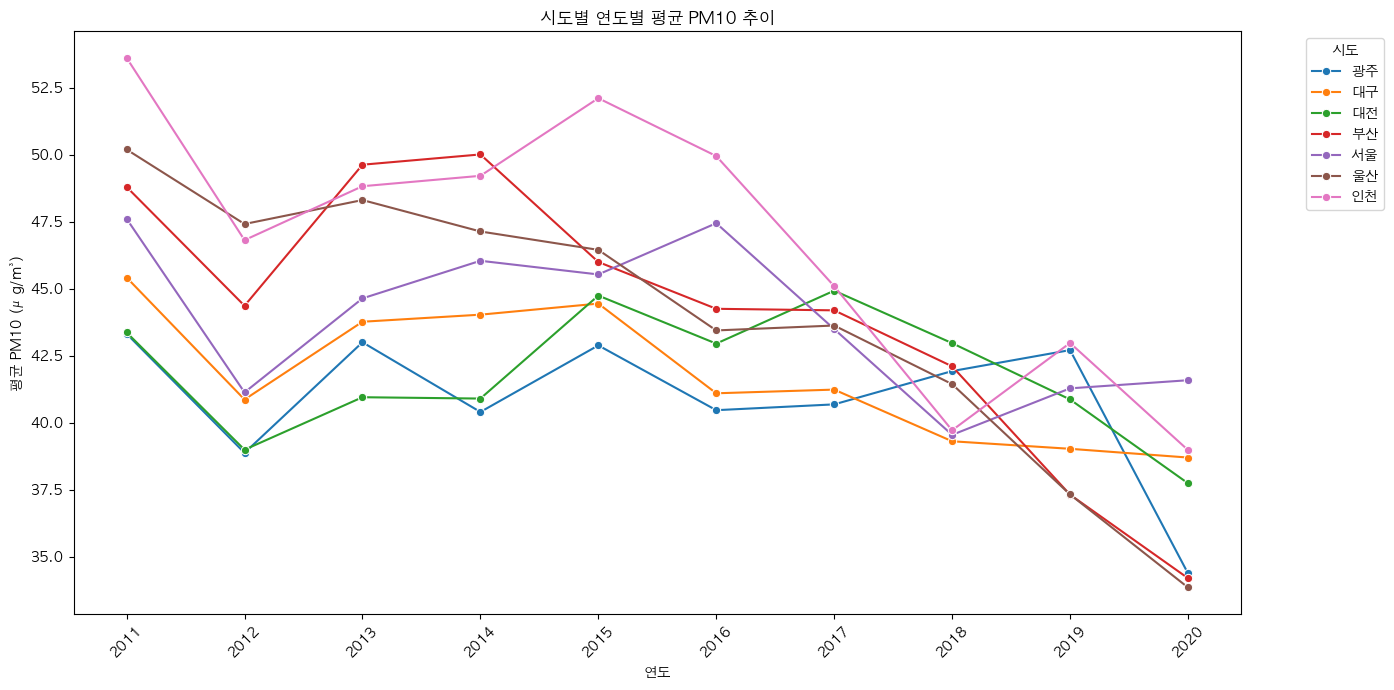

In [22]:
df['연도'] = df['연월'].astype(str).str[:4]
pm10_by_city_year = df.groupby(['시도', '연도'])['PM10'].mean().reset_index()
pm10_by_city_year.rename(columns={'PM10': '평균 PM10'}, inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=pm10_by_city_year, x='연도', y='평균 PM10', hue='시도', marker='o')
plt.title('시도별 연도별 평균 PM10 추이')
plt.xlabel('연도')
plt.ylabel('평균 PM10 (μg/m³)')
plt.legend(title='시도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
df['연월'] = pd.to_datetime(df['연월'], format='%Y%m')

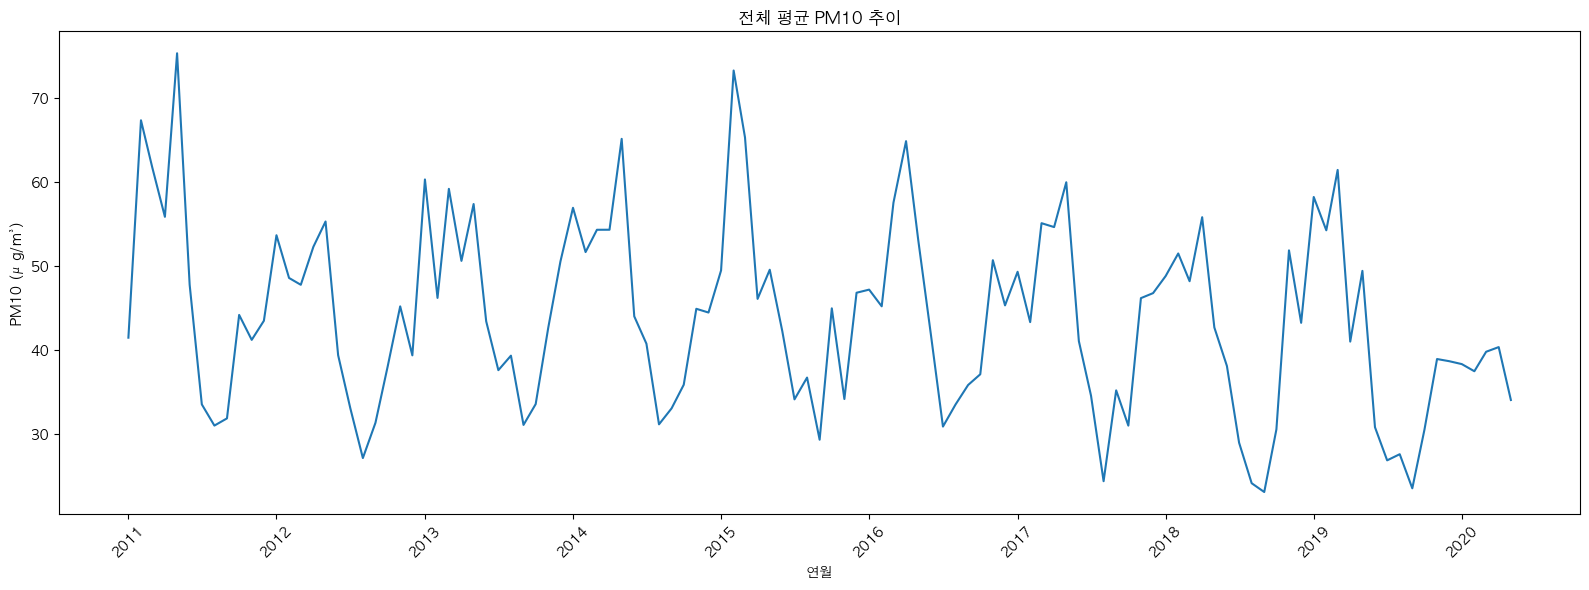

In [20]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 6))
sns.lineplot(data=df.groupby(['연월'])['PM10'].mean().reset_index(), x='연월', y='PM10')
plt.title('전체 평균 PM10 추이')
plt.xlabel('연월')
plt.ylabel('PM10 (μg/m³)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # show major ticks yearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 수치형 데이터와 PM10 상관관계

In [9]:
df.columns = df.columns.str.replace(r'\n', '', regex=True).str.strip()

In [10]:
target_columns = ['PM10', '폐암(C34)', '만성폐쇄성폐질환(J44)', '하기도감염(J20-22)', 
                  '허혈성심질환(I20-22)', '뇌졸중(I60-64)']

df_selected = df[target_columns]

In [11]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)

                    PM10   폐암(C34)  만성폐쇄성폐질환(J44)  하기도감염(J20-22)  \
PM10            1.000000 -0.171933       0.108628       0.317307   
폐암(C34)        -0.171933  1.000000       0.263529      -0.062657   
만성폐쇄성폐질환(J44)   0.108628  0.263529       1.000000       0.028782   
하기도감염(J20-22)   0.317307 -0.062657       0.028782       1.000000   
허혈성심질환(I20-22) -0.070049  0.568437       0.477748      -0.098424   
뇌졸중(I60-64)    -0.046964  0.491054       0.490419      -0.074895   

                허혈성심질환(I20-22)  뇌졸중(I60-64)  
PM10                 -0.070049    -0.046964  
폐암(C34)               0.568437     0.491054  
만성폐쇄성폐질환(J44)         0.477748     0.490419  
하기도감염(J20-22)        -0.098424    -0.074895  
허혈성심질환(I20-22)        1.000000     0.697271  
뇌졸중(I60-64)           0.697271     1.000000  


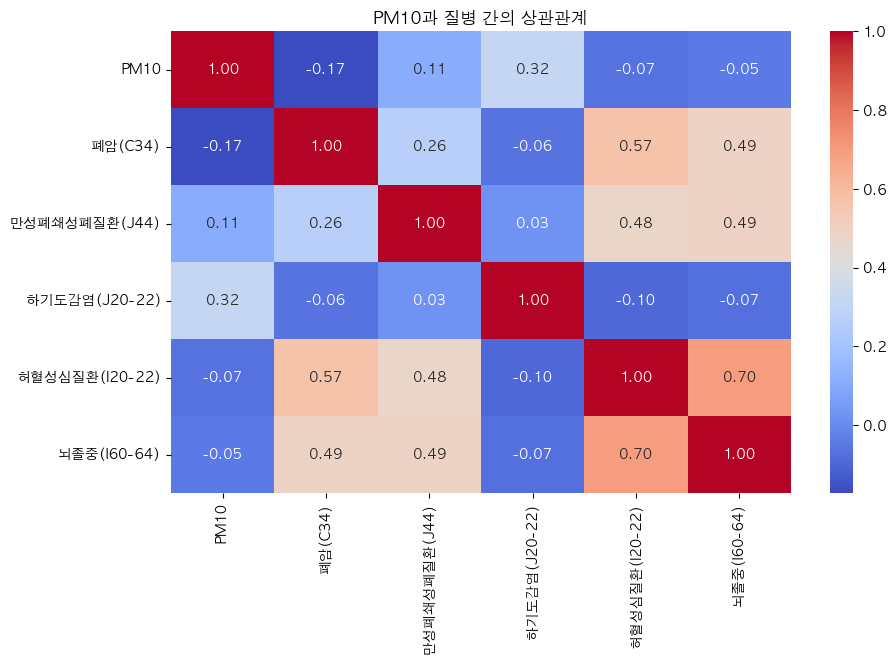

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('PM10과 질병 간의 상관관계')
plt.show()

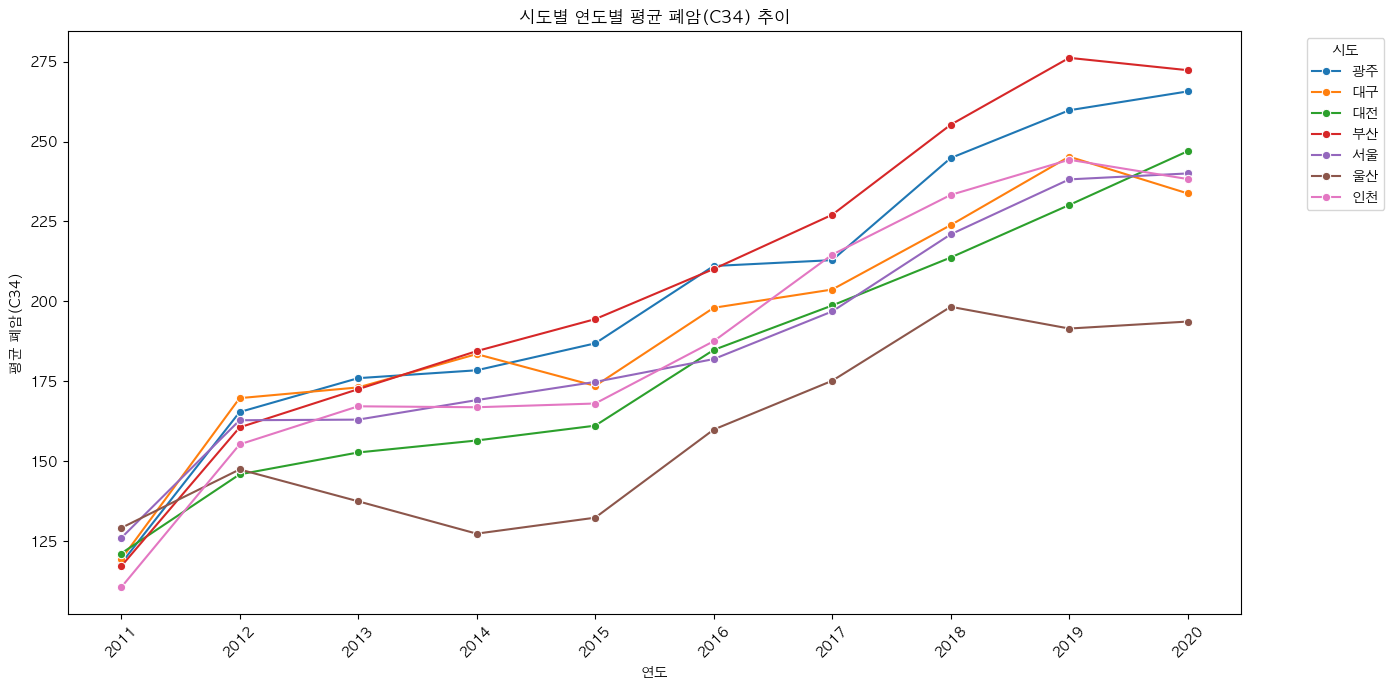

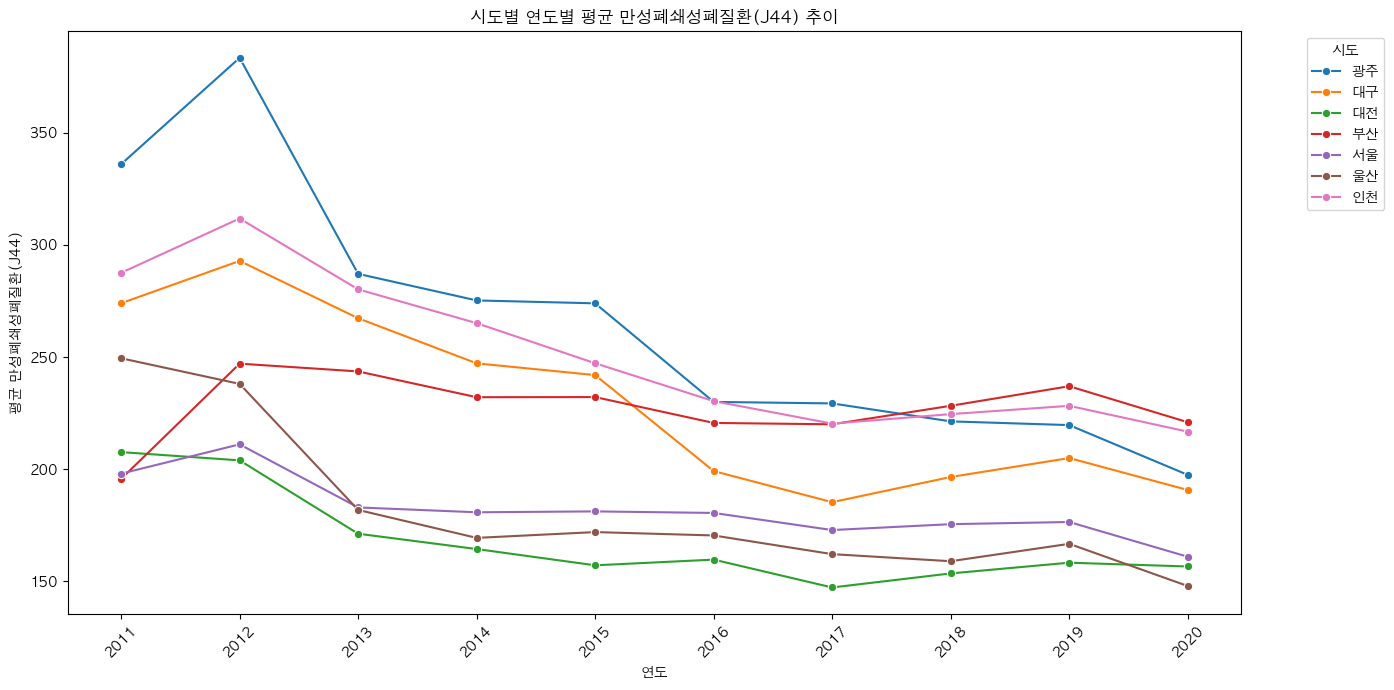

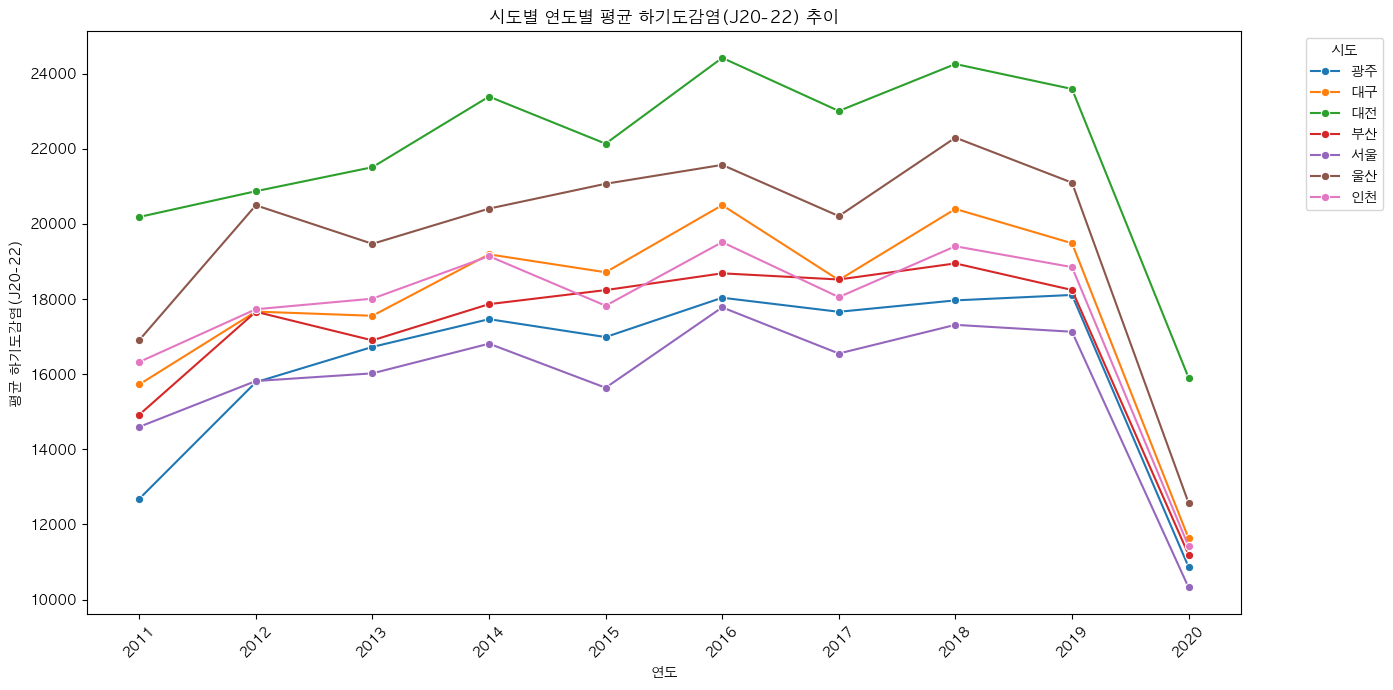

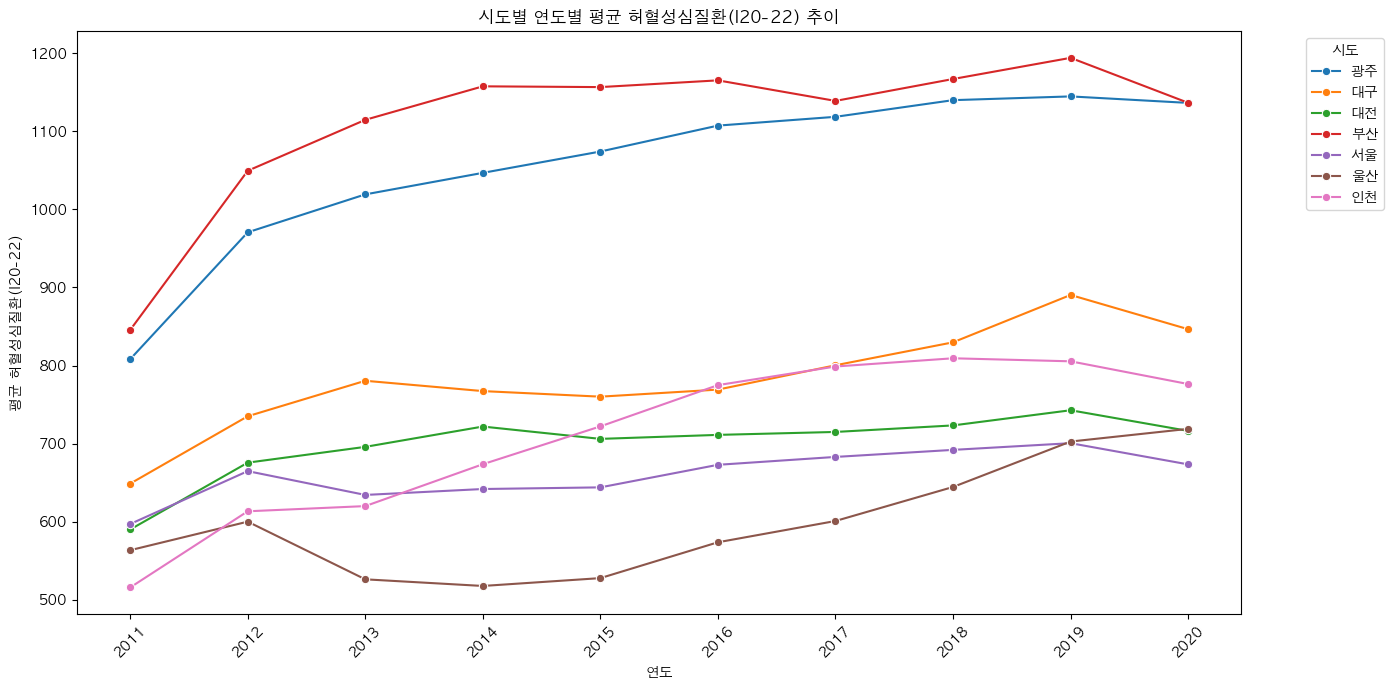

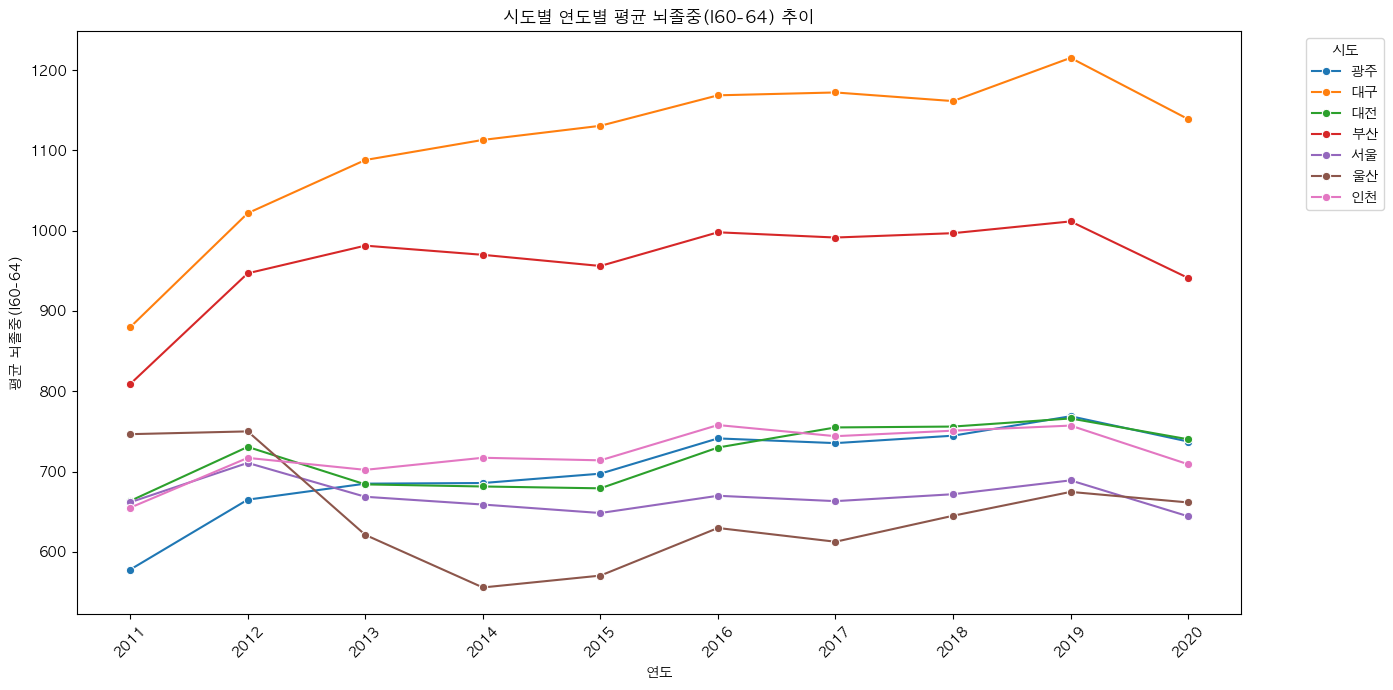

In [13]:
# Clean up the column names if you haven’t already
df.columns = df.columns.str.replace(r'\n', '', regex=True).str.strip()

# Create 연도 column if not already present
df['연도'] = df['연월'].astype(str).str[:4]

# List of disease columns to plot
disease_columns = [
    '폐암(C34)',
    '만성폐쇄성폐질환(J44)',
    '하기도감염(J20-22)',
    '허혈성심질환(I20-22)',
    '뇌졸중(I60-64)'
]

# Plot each disease’s yearly average by 시도
for col in disease_columns:
    avg_by_city_year = df.groupby(['시도', '연도'])[col].mean().reset_index()
    avg_by_city_year.rename(columns={col: f'평균 {col}'}, inplace=True)

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=avg_by_city_year, x='연도', y=f'평균 {col}', hue='시도', marker='o')
    plt.title(f'시도별 연도별 평균 {col} 추이')
    plt.xlabel('연도')
    plt.ylabel(f'평균 {col}')
    plt.legend(title='시도', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
